<a href="https://colab.research.google.com/github/AJAYMUNDARI/Udemy_python_course/blob/main/CodeFiles/Ecommerce_Clothing_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Project

In this project, I worked with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

**The company is trying to decide whether to focus their efforts on their mobile app experience or their website based on given features**

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/Data Set/data.csv')
customers.head(5)

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [ ]:
customers.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [ ]:
customers.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

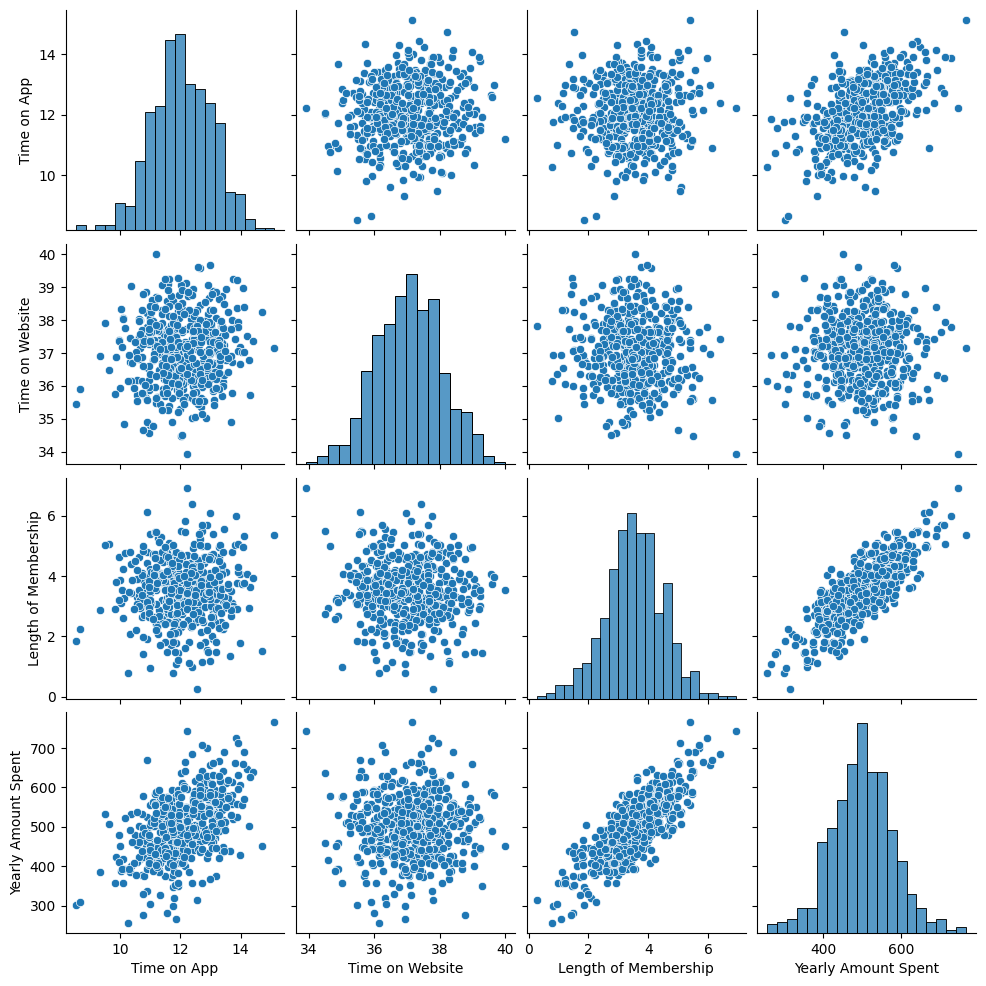

In [ ]:
sns.pairplot(customers)

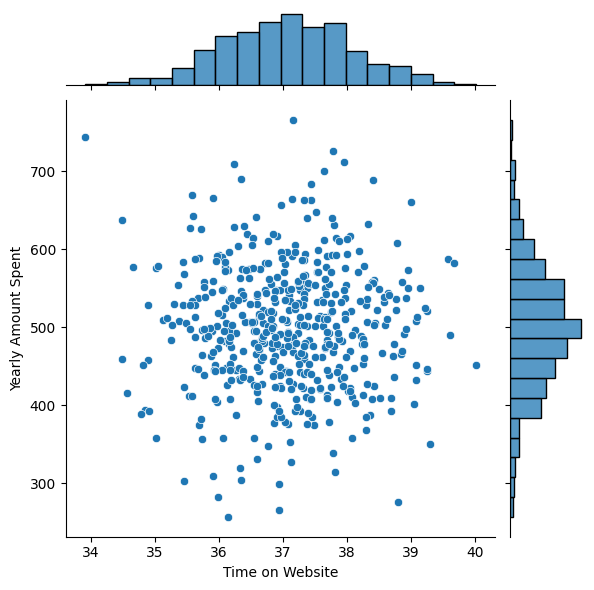

In [ ]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

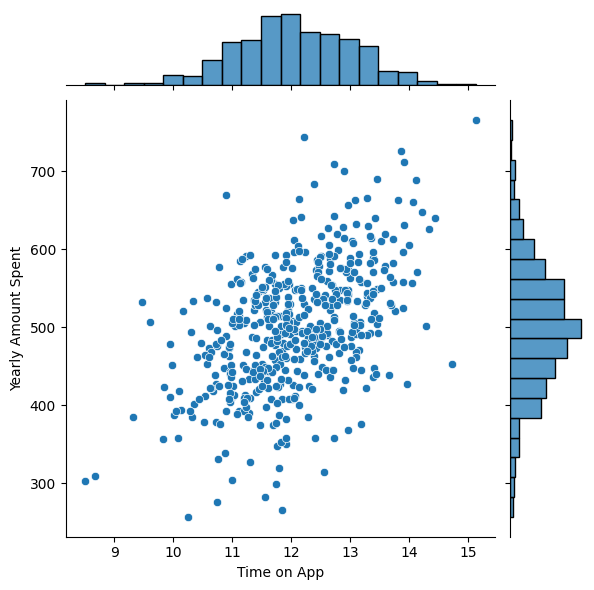

In [ ]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

jointplot to create a 2D hex bin plot comparing two data

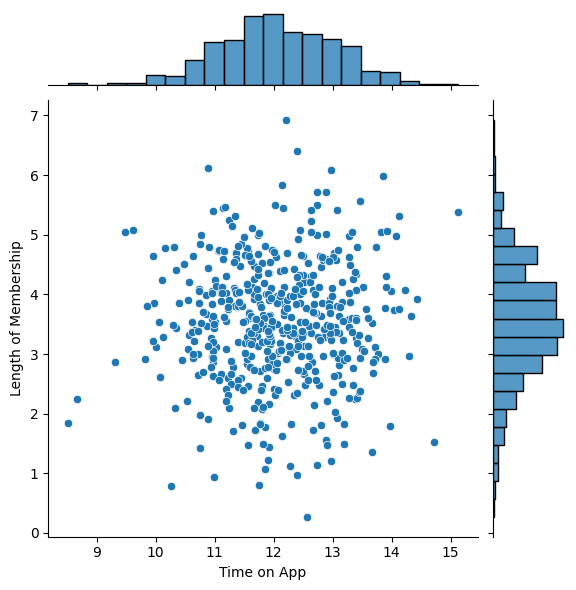

In [ ]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership')

LINEAR MODEL PLOT

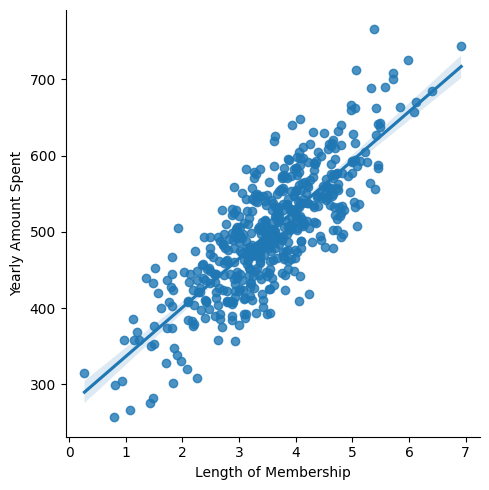

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

Training and Testing Data

In [ ]:
customers.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
y = customers['Yearly Amount Spent']

In [ ]:
X = customers[[ 'Time on App','Time on Website','Length of Membership']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

TRAINING MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([36.73506185,  1.06976162, 62.09959533])

PREDICTING TEST DATA

In [ ]:
predictions = lm.predict(X_test)

SCATTERPLOT of the REAL DATA and PREDICTED DATA

Text(0, 0.5, 'Predicted Values')

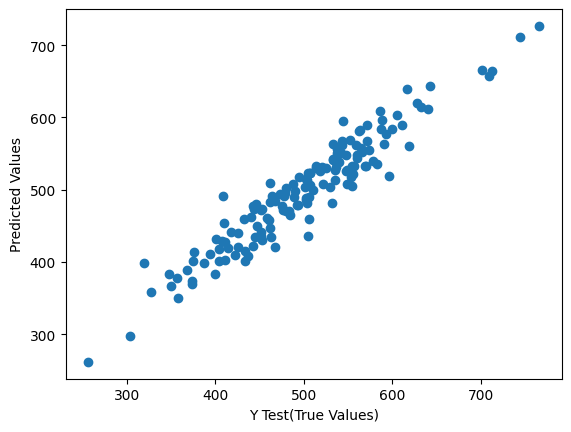

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')

EVALUATING THE MODEL

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 20.68662778076648
MSE 678.3961717781167
RMSE 26.04603946434307


In [ ]:
metrics.explained_variance_score(y_test, predictions)

0.9068561842704586

RESIDUALS

<ipython-input-29-8c748beb4090>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

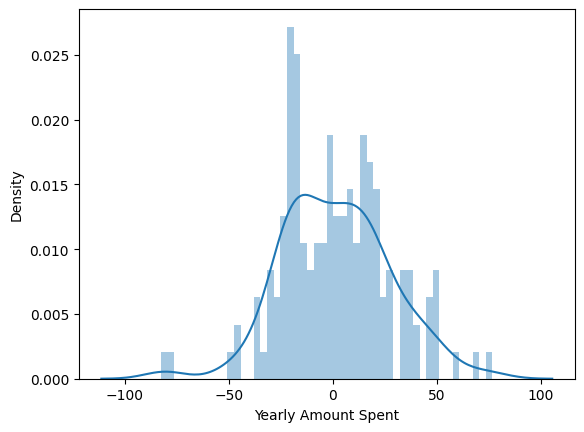

In [ ]:
sns.distplot((y_test-predictions),bins=50)

## **Conclusion**
I still want to figure out the answer to the original question, do i focus my effort on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if i can interpret the coefficients at all to get an idea.

In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns)
cdf.columns = ['Coeffecient']
cdf

,Coeffecient
Time on App,36.735062
Time on Website,1.069762
Length of Membership,62.099595


While interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 36.73 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 1.06 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 62.09 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, I would probably want to **explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!**
